In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget https://dlcdn.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

--2021-12-08 18:42:08--  https://dlcdn.apache.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220400553 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.3-bin-hadoop2.7.tgz’

spark-3.0.3-bin-had 100%[===================>] 210.19M   167MB/s    in 1.3s    

2021-12-08 18:42:22 (167 MB/s) - ‘spark-3.0.3-bin-hadoop2.7.tgz’ saved [220400553/220400553]



In [ ]:
!tar xf /content/spark-3.0.3-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init("/content/spark-3.0.3-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
SpSession = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
#Obtener el Spark Context del Spark Session
SpContext = SpSession.sparkContext
from pyspark.sql import SQLContext
sqlContext = SQLContext(SpContext)

In [ ]:
# Crear un marco de datos desde un archivo CSV
autoData = SpContext.textFile("/content/embeddings.csv")
autoData.take(10)

['54|I forgot my Instagram password. How can I get into my account?|-0.032077003|-0.04660527|-0.020545896|0.009801185|0.03972644|0.04278978|0.01959697|0.028962081|0.072169885|0.07188326|0.043251444|-0.0019551164|0.066698425|-0.072639994|0.051825568|-0.023326047|-0.046956778|0.039371703|-0.07750671|-0.093983926|-0.035893016|-0.059714623|-0.080314785|-0.0023117603|-0.042433064|-0.01848872|-0.050553452|0.05673603|-0.059904944|0.010755042|-0.023975087|0.031216156|-0.07538426|0.035416294|-0.002428347|-0.046859663|-0.046126254|-0.052076645|0.042637203|-0.031027768|-0.06435433|0.01351874|-0.06537033|0.049248103|0.024474297|0.034605857|-0.034604527|0.032894716|0.045777097|0.017020388|0.057958465|0.007067771|-1.6460233e-05|0.0029014477|-0.08547056|0.030823965|0.018735725|0.0038420286|0.032747336|0.10674131|-0.002906175|-0.05691473|-0.03640092|0.061991066|-0.06958464|-0.04546907|0.018751737|0.053285304|0.026393011|-0.0024215637|-0.018397301|-0.06585622|-0.13432032|-0.0063329865|0.03466116|0.0200

In [ ]:
from pyspark.sql import Row
import math
from pyspark.ml.linalg import Vectors

# Convertir a un vector
def transformToNumeric(inputStr):
  attList = inputStr.split("|")

  fieldText = "field"
  rowDic = {}
  for i in range(1,385):
    field = fieldText + str(i)
    rowDic[field] = float(attList[i + 1])
  values = Row(**rowDic)

  return values



In [ ]:
from pyspark.sql import Row
import math
from pyspark.ml.linalg import Vectors

automap = autoData.map(transformToNumeric)
automap.take(10)

[Row(field1=-0.032077003, field2=-0.04660527, field3=-0.020545896, field4=0.009801185, field5=0.03972644, field6=0.04278978, field7=0.01959697, field8=0.028962081, field9=0.072169885, field10=0.07188326, field11=0.043251444, field12=-0.0019551164, field13=0.066698425, field14=-0.072639994, field15=0.051825568, field16=-0.023326047, field17=-0.046956778, field18=0.039371703, field19=-0.07750671, field20=-0.093983926, field21=-0.035893016, field22=-0.059714623, field23=-0.080314785, field24=-0.0023117603, field25=-0.042433064, field26=-0.01848872, field27=-0.050553452, field28=0.05673603, field29=-0.059904944, field30=0.010755042, field31=-0.023975087, field32=0.031216156, field33=-0.07538426, field34=0.035416294, field35=-0.002428347, field36=-0.046859663, field37=-0.046126254, field38=-0.052076645, field39=0.042637203, field40=-0.031027768, field41=-0.06435433, field42=0.01351874, field43=-0.06537033, field44=0.049248103, field45=0.024474297, field46=0.034605857, field47=-0.034604527, 

In [ ]:
autoDf = SpSession.createDataFrame(automap)
autoDf.show()

+-------------+------------+-------------+-------------+------------+-------------+-------------+-------------+-----------+-----------+-------------+-------------+-----------+------------+-------------+-------------+------------+------------+------------+------------+------------+------------+------------+-------------+-------------+-------------+------------+-----------+------------+-------------+------------+------------+-------------+-------------+-------------+------------+------------+-------------+------------+------------+------------+-------------+------------+-------------+-------------+-----------+------------+-----------+-------------+-------------+-------------+------------+-------------+-------------+------------+-------------+------------+-------------+------------+-----------+------------+-------------+------------+-------------+------------+------------+-------------+-----------+-------------+-------------+------------+-------------+------------+-------------+----------

In [ ]:
sumStats=autoDf.describe().toPandas()
sumStats

,summary,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,field30,field31,field32,field33,field34,field35,field36,field37,field38,field39,...,field345,field346,field347,field348,field349,field350,field351,field352,field353,field354,field355,field356,field357,field358,field359,field360,field361,field362,field363,field364,field365,field366,field367,field368,field369,field370,field371,field372,field373,field374,field375,field376,field377,field378,field379,field380,field381,field382,field383,field384
0,count,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210
1,mean,0.017402452565714287,-0.024181971268571415,0.003975625110619046,-0.024191610649142856,-0.017816011076190477,-0.008758601616523809,0.0470926459748,0.0025672360674190483,-0.014485677437904758,0.0125597131382381,0.01739967686400952,0.04213796836285715,0.007995671175952377,-0.005014312796857147,0.050307560995552385,0.009898195769666664,6.986256802190433E-4,0.06270603533219049,-0.04810821545466666,-0.040584269047857155,0.0174161794192381,-5.917775802380922E-4,-0.028048279734047617,0.013554220770523808,-0.028480826528047624,0.003169405043266666,-0.003198715110857141,-6.319231177619053E-4,-0.004643459035285712,-0.016539023594571434,-0.00547977110660476,4.484302780725271E-4,0.0030940065938095235,0.007567446862619047,-0.05261091030952382,0.022044256981666673,0.030098871523666658,-0.026833956802952377,0.048457728098809535,...,0.007859865265380952,-0.009245992228023817,0.03496330095728572,0.013332944049999993,0.029033959465952372,0.01502590872814287,-0.04591509996785715,-0.009682069866285718,-0.03803783091257142,-0.01974803482544047,-0.0521447288887619,-0.010402162716719048,0.001491992713685714,0.02691581106147619,0.016155411134571435,0.026453606725238093,-0.010384613315085717,0.0035037226934285697,0.006143519872333329,0.026295892060619042,0.014914645234761905,-0.020649934518619035,-0.0576025718868476,-0.006682499952000002,0.027417867586142862,-0.05546827266476191,-0.003922647673684767,0.020634768788261895,0.035535004087619046,0.018918129870999993,-0.0032267023131904733,0.021924050890285724,-0.005421343421238097,-0.01912698932028571,-0.029566768419999997,0.01083520189219048,0.013245640293476184,0.010262740593619054,-0.01618967494038095,-0.028491546359761914
2,stddev,0.07523882295038627,0.05551505076498351,0.052285625806389895,0.030089410109601315,0.05255810212992083,0.023337917990761053,0.04724259529553174,0.026098743667398037,0.039327664762775265,0.037460382514877974,0.030041936129531623,0.04477139732252217,0.030464183733386368,0.035877585947116986,0.032585886185746184,0.024358232129562934,0.04937259264426871,0.06842035509153549,0.024167005868622606,0.08683925758800747,0.0602370149914259,0.058298170263291996,0.034135115107821294,0.026105483509253197,0.027105427223949173,0.028570436806509565,0.03493448677054234,0.028296099934654328,0.04924057585975743,0.041575216355500384,0.028418377637300294,0.037396334650448226,0.02979314371165913,0.02376919367226302,0.03239509671678732,0.03906624598023009,0.03807801603853352,0.04356247077796466,0.031775144322078314,...,0.0334819255595399,0.04513651465478035,0.043671814142596785,0.06566930738674519,0.025155687131301268,0.046557872671111104,0.031628500739762075,0.026318608959067076,0.03642131038707891,0.033805492052995025,0.04352488542150298,0.027186606302923216,0.030652810984397674,0.0654348273237258,0.03230133216120035,0.060823984051566866,0.022676793013084087,0.051072640624484085,0.04567171495037473,0.030210538660278636,0.03420807029582437,0.0688265211500483,0.0397674126624943,0.028304518988686928,0.027784364

In [ ]:
meanValues = sumStats.iloc[1,1:385].values.tolist()
meanValues[0:10]

['0.017402452565714287',
 '-0.024181971268571415',
 '0.003975625110619046',
 '-0.024191610649142856',
 '-0.017816011076190477',
 '-0.008758601616523809',
 '0.0470926459748',
 '0.0025672360674190483',
 '-0.014485677437904758',
 '0.0125597131382381']

In [ ]:
stdValues = sumStats.iloc[2,1:385].values.tolist()
stdValues[0:10]

['0.07523882295038627',
 '0.05551505076498351',
 '0.052285625806389895',
 '0.030089410109601315',
 '0.05255810212992083',
 '0.023337917990761053',
 '0.04724259529553174',
 '0.026098743667398037',
 '0.039327664762775265',
 '0.037460382514877974']

In [ ]:
bcMeans = SpContext.broadcast(meanValues)
bcStdDev = SpContext.broadcast(stdValues)

In [ ]:
def centerAndScale(inRow):
  global bcMeans
  global bcStdDev

  meanArray = bcMeans.value
  stdArray = bcStdDev.value

  retArray = []
  for i in range(len(meanArray)):
    retArray.append( (float(inRow[i]) - float(meanArray[i])) / float(stdArray[i]) )
  return Vectors.dense(retArray)

In [ ]:
def toVector(inRow):

  retArray = []
  for i in range(len(inRow)):
    retArray.append( (float(inRow[i])) )
  return Vectors.dense(retArray)

In [ ]:
csAutoNorm = autoDf.rdd.map(centerAndScale)
csAutoNorm.take(5)

[DenseVector([-0.6576, -0.4039, -0.469, 1.1297, 1.0948, 2.2088, -0.582, 1.0113, 2.2034, 1.5836, 0.8605, -0.9848, 1.9269, -1.8849, 0.0466, -1.364, -0.9652, -0.341, -1.2165, -0.6149, -0.885, -1.0141, -1.5312, -0.6078, -0.5147, -0.7581, -1.3555, 2.0274, -1.1223, 0.6565, -0.6508, 0.8227, -2.6341, 1.1716, 1.5491, -1.7638, -2.0018, -0.5795, -0.1832, -0.0228, -0.5036, 0.9749, -1.8207, 2.6819, -1.9892, 0.9802, -0.8288, -0.5054, 0.68, 1.0824, 1.3953, 0.1708, 0.7501, -0.7743, -1.8234, 1.0905, 0.9825, -0.7005, 0.1062, 1.7349, -0.1478, -0.9872, 0.3315, 0.8992, -1.271, -1.0866, -0.0828, 0.7163, 0.8869, -2.198, -0.5694, -1.1127, -2.7987, -0.5279, 1.115, 0.4654, -0.0972, -1.1702, 1.5821, 2.253, -0.8347, 1.7192, -0.3409, 1.6656, 1.3003, 0.4494, 0.6029, 1.7571, 0.0754, -0.0505, -1.2713, 0.4178, -0.5394, -2.1798, -0.3977, -0.884, -0.8674, 2.1613, -1.8304, -1.5013, -0.7539, 0.1525, 0.49, 1.199, 1.0546, -0.4051, 2.2928, 0.4727, 1.107, 2.1275, -1.0741, -2.1301, 0.6117, 2.0114, 0.5808, 0.0145, -2.3865, -0.0

In [ ]:
csAuto = autoDf.rdd.map(toVector)
csAuto.take(5)

[DenseVector([-0.0321, -0.0466, -0.0205, 0.0098, 0.0397, 0.0428, 0.0196, 0.029, 0.0722, 0.0719, 0.0433, -0.002, 0.0667, -0.0726, 0.0518, -0.0233, -0.047, 0.0394, -0.0775, -0.094, -0.0359, -0.0597, -0.0803, -0.0023, -0.0424, -0.0185, -0.0506, 0.0567, -0.0599, 0.0108, -0.024, 0.0312, -0.0754, 0.0354, -0.0024, -0.0469, -0.0461, -0.0521, 0.0426, -0.031, -0.0644, 0.0135, -0.0654, 0.0492, 0.0245, 0.0346, -0.0346, 0.0329, 0.0458, 0.017, 0.058, 0.0071, -0.0, 0.0029, -0.0855, 0.0308, 0.0187, 0.0038, 0.0327, 0.1067, -0.0029, -0.0569, -0.0364, 0.062, -0.0696, -0.0455, 0.0188, 0.0533, 0.0264, -0.0024, -0.0184, -0.0659, -0.1343, -0.0063, 0.0347, 0.0201, -0.021, -0.0592, 0.0439, 0.121, -0.0356, 0.0416, -0.0147, 0.0581, 0.1128, 0.0347, 0.0115, 0.0376, -0.0093, -0.021, -0.0022, 0.0046, -0.0425, -0.0699, -0.0213, -0.0018, -0.0449, 0.0469, -0.1185, 0.0177, 0.0142, 0.0099, -0.012, 0.0291, 0.0149, -0.0081, 0.1011, 0.042, 0.0234, 0.0445, -0.0249, -0.0635, 0.0281, 0.1039, 0.0561, -0.0068, -0.0361, 0.0169, 0

In [ ]:
autoRows = csAutoNorm.map(lambda f: Row(features=f))
autoDfNorm = SpSession.createDataFrame(autoRows)

autoDfNorm.select("features").show(10)

+--------------------+
|            features|
+--------------------+
|[-0.6576319727694...|
|[-0.2962047130961...|
|[-0.7136645080309...|
|[-0.4930374919631...|
|[-0.5794465922793...|
|[-0.3575984911866...|
|[-0.9806183120962...|
|[-0.5545841219928...|
|[-0.5692384315203...|
|[-0.2627564745231...|
+--------------------+
only showing top 10 rows



In [ ]:
autoRows = csAuto.map(lambda f: Row(features=f))
autoDf = SpSession.createDataFrame(autoRows)

autoDf.select("features").show(10)

+--------------------+
|            features|
+--------------------+
|[-0.032077003,-0....|
|[-0.0048836414,-0...|
|[-0.036292825,-0....|
|[-0.019693108,-0....|
|[-0.026194427,-0....|
|[-0.009502837,-0....|
|[-0.056378115,-0....|
|[-0.024323804,-0....|
|[-0.025426377,-0....|
|[-0.0023670353,-0...|
+--------------------+
only showing top 10 rows



In [ ]:
from pyspark.ml.clustering import KMeans

kmeansNorm = KMeans(k = 3, seed = 1)
modelNorm = kmeansNorm.fit(autoDfNorm)
predictionsNorm = modelNorm.transform(autoDfNorm)
predictionsNorm.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-0.6576319727694...|         0|
|[-0.2962047130961...|         0|
|[-0.7136645080309...|         0|
|[-0.4930374919631...|         0|
|[-0.5794465922793...|         0|
|[-0.3575984911866...|         0|
|[-0.9806183120962...|         0|
|[-0.5545841219928...|         0|
|[-0.5692384315203...|         0|
|[-0.2627564745231...|         0|
|[-0.6268011741333...|         0|
|[-0.6639262498651...|         0|
|[-0.7705188663563...|         0|
|[-0.6179381965660...|         0|
|[-0.5836945720784...|         0|
|[-0.8556641111752...|         0|
|[-0.5480661306052...|         0|
|[-0.7835802482528...|         0|
|[-0.9634323441438...|         0|
|[-0.9922012285458...|         0|
+--------------------+----------+
only showing top 20 rows



In [ ]:
kmeans = KMeans(k = 3, seed = 1)
model = kmeans.fit(autoDf)
predictions = model.transform(autoDf)
predictions.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-0.032077003,-0....|         0|
|[-0.0048836414,-0...|         0|
|[-0.036292825,-0....|         0|
|[-0.019693108,-0....|         0|
|[-0.026194427,-0....|         0|
|[-0.009502837,-0....|         0|
|[-0.056378115,-0....|         0|
|[-0.024323804,-0....|         0|
|[-0.025426377,-0....|         0|
|[-0.0023670353,-0...|         0|
|[-0.02975733,-0.0...|         0|
|[-0.032550577,-0....|         0|
|[-0.04057048,-0.0...|         0|
|[-0.02909049,-0.0...|         0|
|[-0.02651404,-0.0...|         0|
|[-0.046976708,-0....|         0|
|[-0.023833398,-0....|         0|
|[-0.041553203,-0....|         0|
|[-0.055085063,-0....|         0|
|[-0.0572496,-0.02...|         0|
+--------------------+----------+
only showing top 20 rows



In [ ]:
print(predictionsNorm.count())
print(predictions.count())

210
210


In [ ]:
predictionsNormValues = predictionsNorm.select("prediction").rdd.flatMap(lambda x: x).collect()
predictionsValues = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

In [ ]:
print("Predictions from Normalized Data")
for p in predictionsNormValues:
  print(p, end=" ")

Predictions from Normalized Data
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
print("Predictions from Data")
for p in predictionsValues:
  print(p, end=" ")

Predictions from Data
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

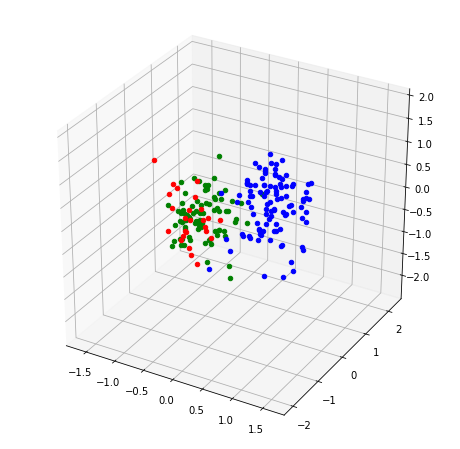

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

for row in predictionsNorm.rdd.collect():
  points = row.features[0:3]
  if (row.prediction == 0):
    ax.scatter(points[0], points[1], points[2], color = "red")
  elif (row.prediction == 1):
    ax.scatter(points[0], points[1], points[2], color = "blue")
  else:
    ax.scatter(points[0], points[1], points[2], color = "green")

plt.show()

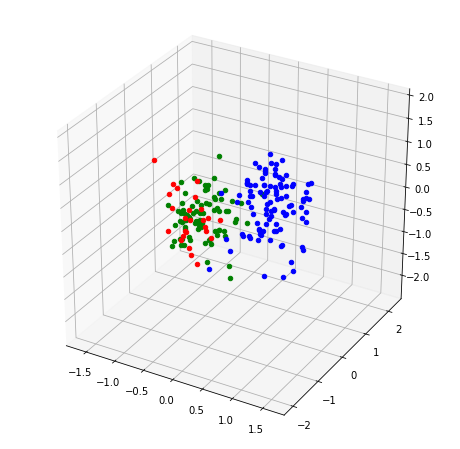

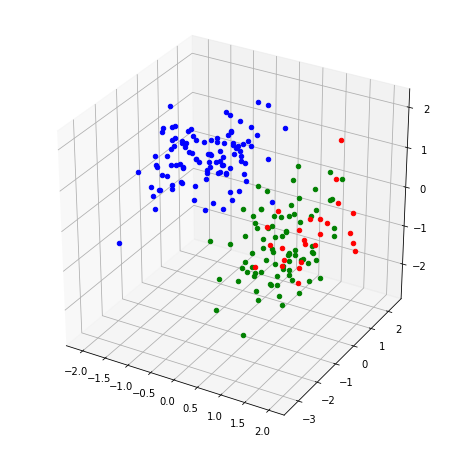

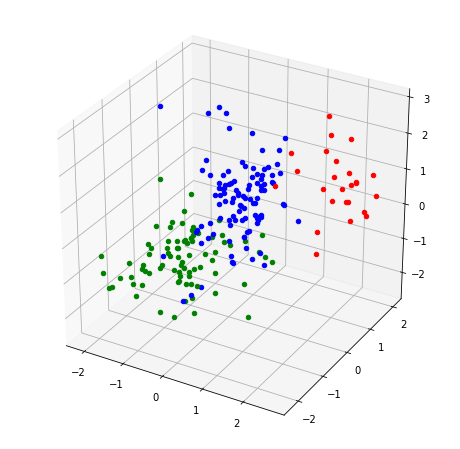

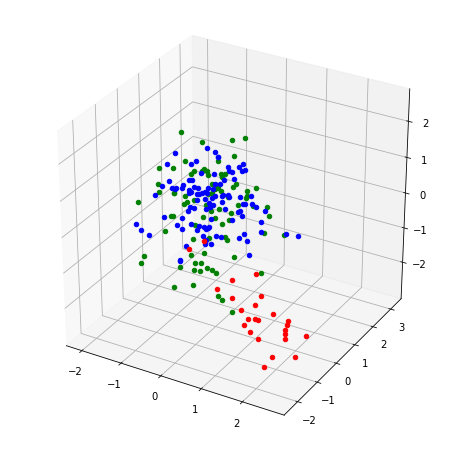

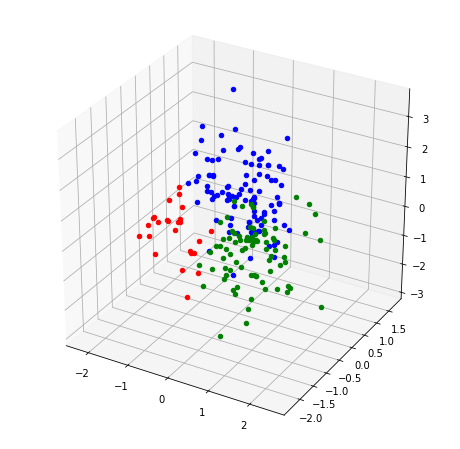

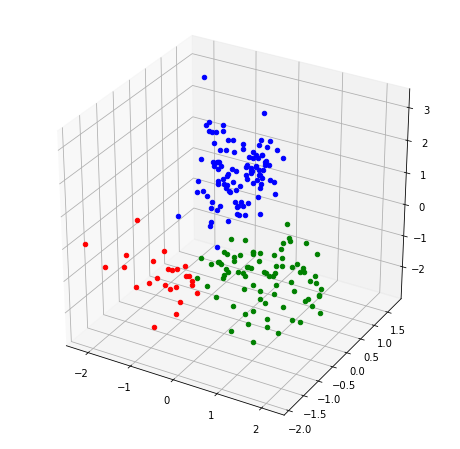

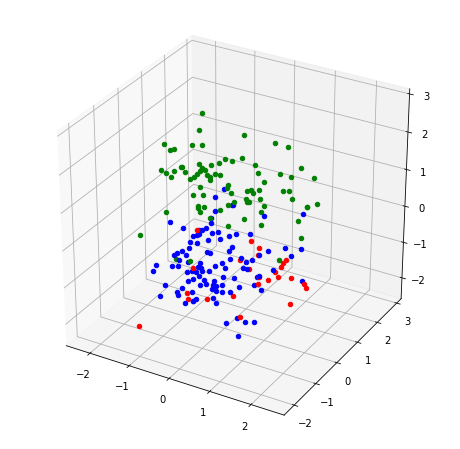

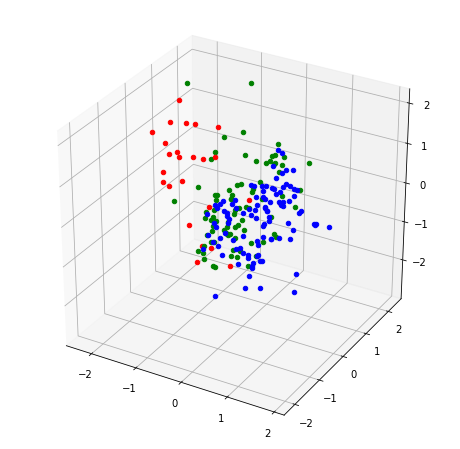

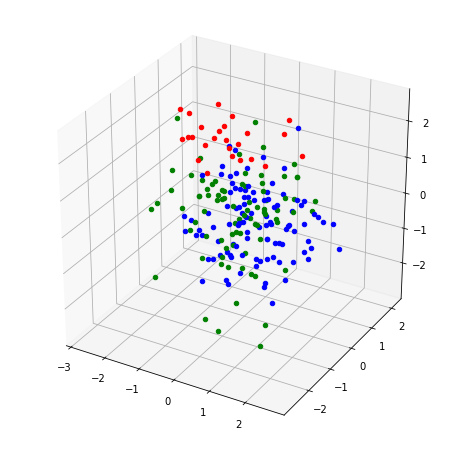

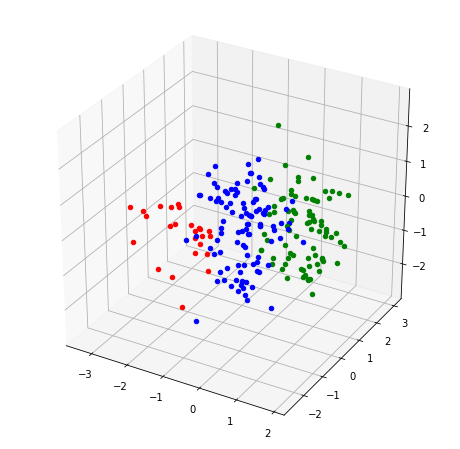

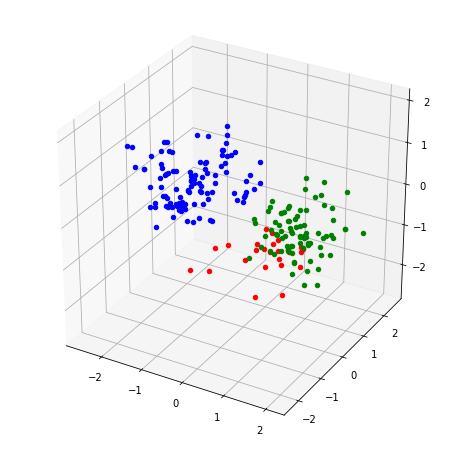

In [ ]:
for i in range(0, 41, 4):
  fig = plt.figure(figsize=(8,8))

  ax = fig.add_subplot(111, projection='3d')

  for row in predictionsNorm.rdd.collect():
    points = row.features[i:i + 3]
    if (row.prediction == 0):
      ax.scatter(points[0], points[1], points[2], color = "red")
    elif (row.prediction == 1):
      ax.scatter(points[0], points[1], points[2], color = "blue")
    else:
      ax.scatter(points[0], points[1], points[2], color = "green")

  plt.show()